#### Link:
Download pandas json :
https://ai-process-sandy.s3.eu-west-1.amazonaws.com/purge/deviation.json
#### Task context:
These are deviations of floor vs ceiling corners of one of our models with ground truth labels
for the room name and number of corners in that room with predictions. Please create
meaningful statistics of how well the model performed.
#### Additional information:
Gt_corners = ground truth number of corners in the room
Rb_corners = number of corners found by the model
Mean max min and all others are deviation values in degrees.

#### Main tasks:
Create project in idea, pycharm or vscode

Create requirements.txt and virtual env

Create class for drawing plots

Create function “draw_plots”

→ reads json file passed as parameter as a pandas dataframe

→ draws plot for comparing different columns

→ saves plots in a folder called “plots”

→ returns paths to all plots


Create jupyter notebook called Notebook.ipynb in the root directory to call and visualize our
plots

Publish the project on github

Email us with link to your project

1347 0


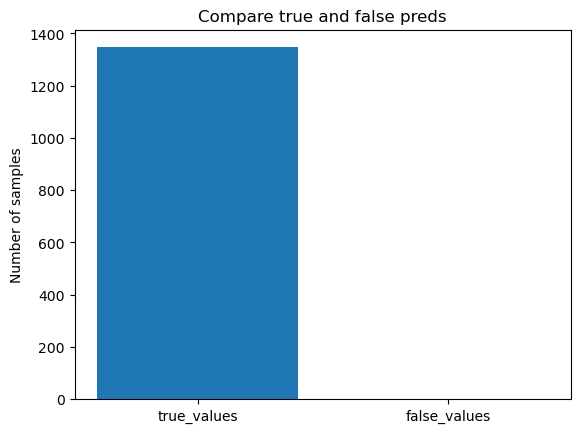

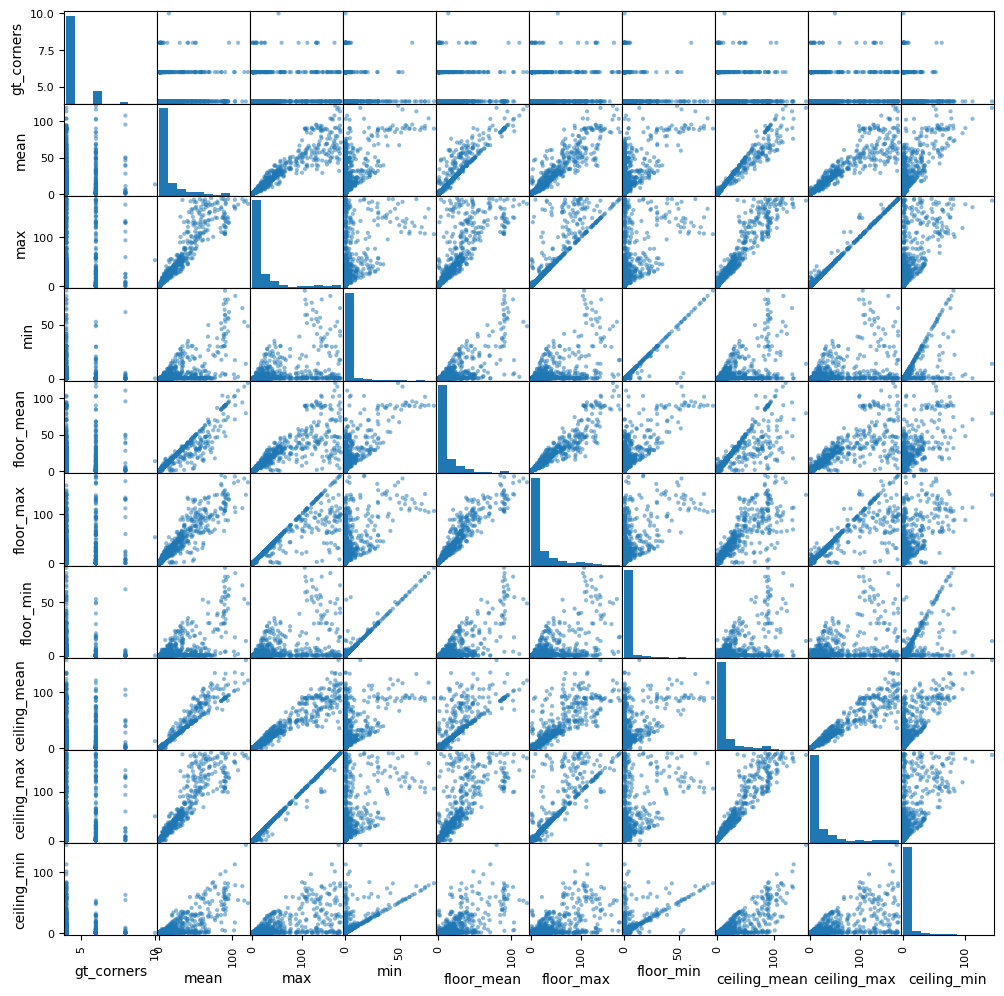

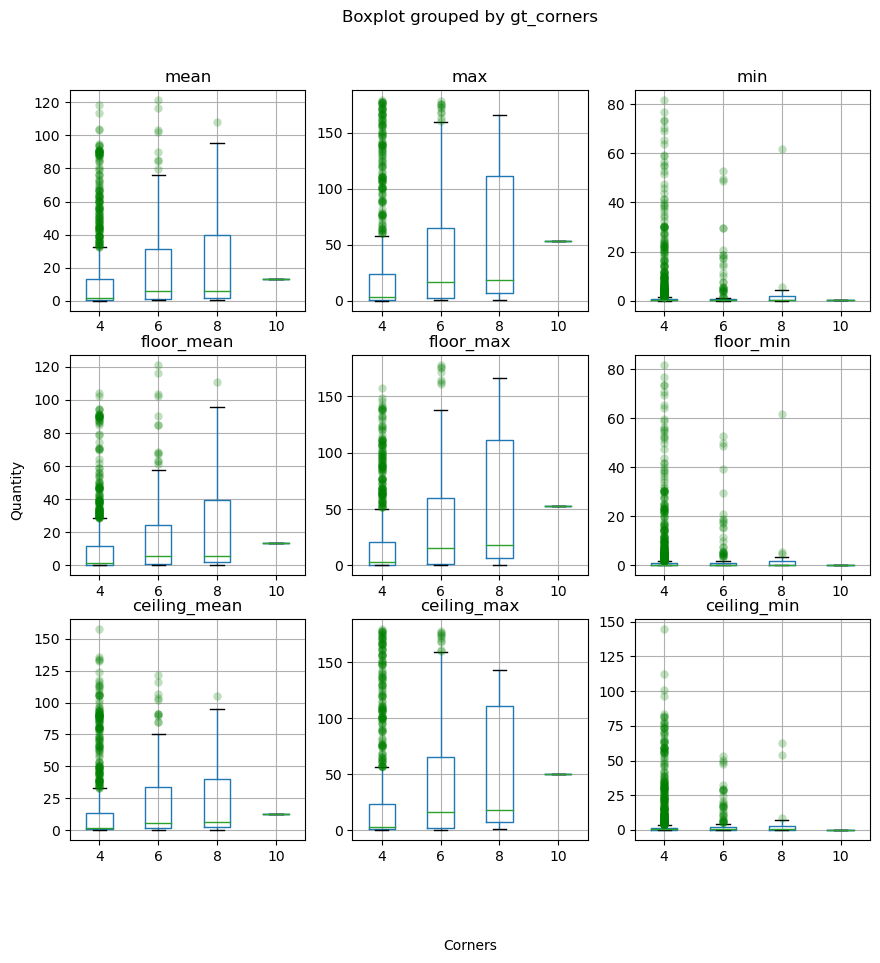

['c:\\Users\\Vadim\\source\\repos\\test_assigment\\plots\\comarision.png',
 'c:\\Users\\Vadim\\source\\repos\\test_assigment\\plots\\scatter_matrix.png',
 'c:\\Users\\Vadim\\source\\repos\\test_assigment\\plots\\boxplots.png']

In [1]:
from plot import GraphPlotter
plotter = GraphPlotter(folder="plots", json_path="https://ai-process-sandy.s3.eu-west-1.amazonaws.com/purge/deviation.json")
plotter.draw_plots() 

#### Дополнение

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
import pandas as pd
df = pd.read_json('https://ai-process-sandy.s3.eu-west-1.amazonaws.com/purge/deviation.json')
df.head(5)

,name,gt_corners,rb_corners,mean,max,min,floor_mean,floor_max,floor_min,ceiling_mean,ceiling_max,ceiling_min
0,Schlafzimmer,4,4,3.956313,8.562939,0.274574,3.987864,8.562939,0.274574,3.924762,8.501885,0.331494
1,Küche,4,4,23.019122,52.605437,0.724299,1.253103,1.897612,0.724299,44.785141,52.605437,36.880814
2,Bathroom,4,4,1.013833,1.950322,0.301673,0.659138,1.318714,0.301673,1.368528,1.950322,0.878106
3,Lounge/Diner,8,8,3.832620,18.236935,0.173307,3.600083,15.041431,0.173307,4.065157,18.236935,0.253457
4,Essbereich,4,4,8.017758,15.642853,0.762948,7.819446,15.399635,0.762948,8.216069,15.642853,0.909029


Show basic information about DataFrame

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1347 entries, 0 to 1346
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          1347 non-null   object 
 1   gt_corners    1347 non-null   int64  
 2   rb_corners    1347 non-null   int64  
 3   mean          1347 non-null   float64
 4   max           1347 non-null   float64
 5   min           1347 non-null   float64
 6   floor_mean    1347 non-null   float64
 7   floor_max     1347 non-null   float64
 8   floor_min     1347 non-null   float64
 9   ceiling_mean  1347 non-null   float64
 10  ceiling_max   1347 non-null   float64
 11  ceiling_min   1347 non-null   float64
dtypes: float64(9), int64(2), object(1)
memory usage: 136.8+ KB


In [56]:
print((df.gt_corners.unique() == df.rb_corners.unique()).all())
X_axis = df.gt_corners.unique()

True


Unique values are same. Lets check if any difference beetween predicted values and ground truth

In [57]:
print(df.groupby('rb_corners')["rb_corners"].count())
print(f"Equality of two columns is: {df['rb_corners'].equals(df['gt_corners'])}")

rb_corners
4     1163
6      162
8       21
10       1
Name: rb_corners, dtype: int64
Equality of two columns is: True


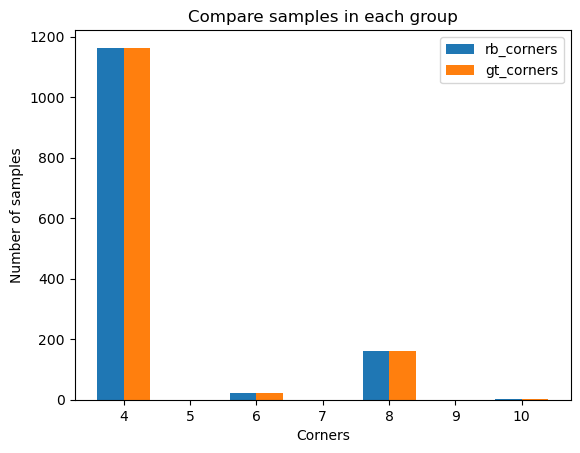

In [58]:

plt.bar(X_axis - 0.2, df.groupby('rb_corners')["rb_corners"].count(), 0.4, label = 'rb_corners')
plt.bar(X_axis + 0.2, df.groupby('gt_corners')["gt_corners"].count(), 0.4, label = 'gt_corners')

#plt.xticks(X_axis, X)
plt.xlabel("Corners")
plt.ylabel("Number of samples")
plt.title("Compare samples in each group")
plt.legend()
plt.show()

Столбцы rb_corners и gt_corners идентичны, точность модели - 100%. 

Чтобы сделать данные более удобными для работы их можно почистить.

Необходимо убрать один из столбцов rb_corners или gt_corners, по скольку они одинаковы.

Можно убрать поле name, поскольку оно не несет смысла

In [59]:
df_clear = df.drop(['rb_corners', 'name'], axis=1)
df_clear.head()

,gt_corners,mean,max,min,floor_mean,floor_max,floor_min,ceiling_mean,ceiling_max,ceiling_min
0,4,3.956313,8.562939,0.274574,3.987864,8.562939,0.274574,3.924762,8.501885,0.331494
1,4,23.019122,52.605437,0.724299,1.253103,1.897612,0.724299,44.785141,52.605437,36.880814
2,4,1.013833,1.950322,0.301673,0.659138,1.318714,0.301673,1.368528,1.950322,0.878106
3,8,3.832620,18.236935,0.173307,3.600083,15.041431,0.173307,4.065157,18.236935,0.253457
4,4,8.017758,15.642853,0.762948,7.819446,15.399635,0.762948,8.216069,15.642853,0.909029


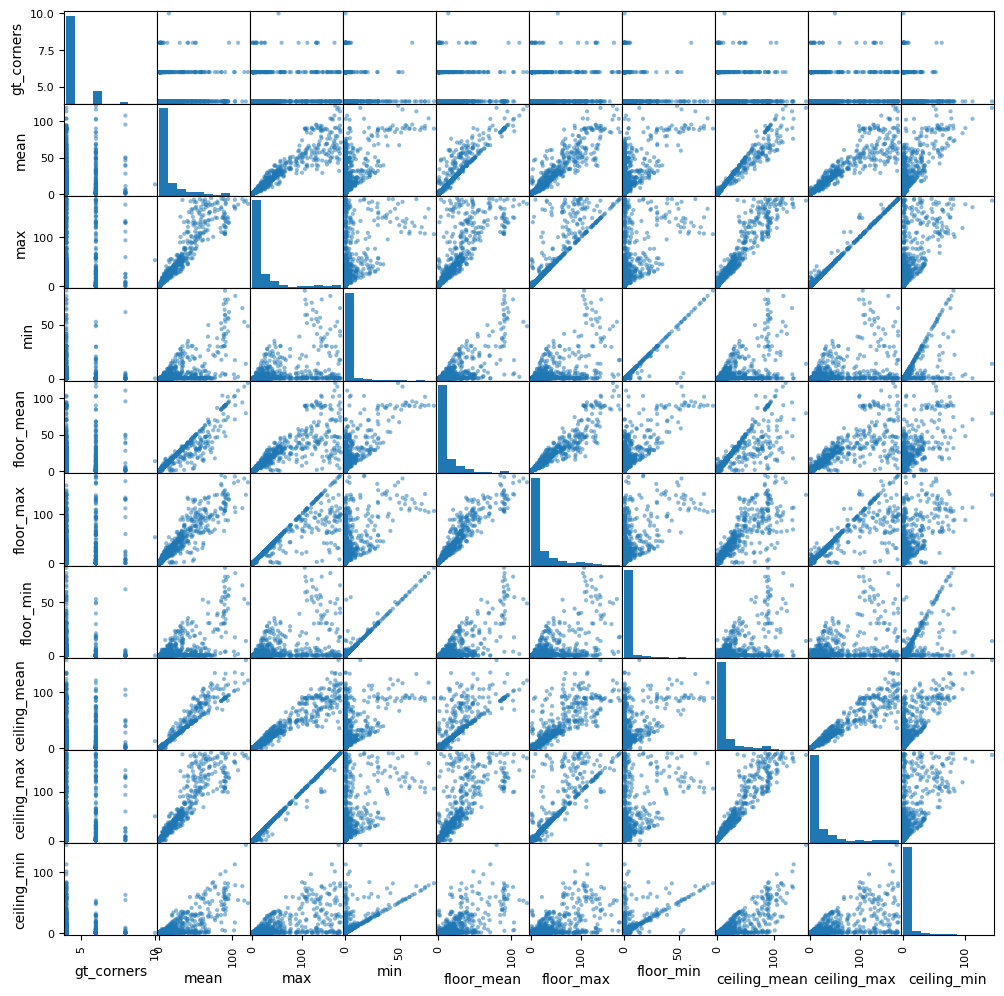

In [88]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_clear, figsize=(12, 12))
plt.show()

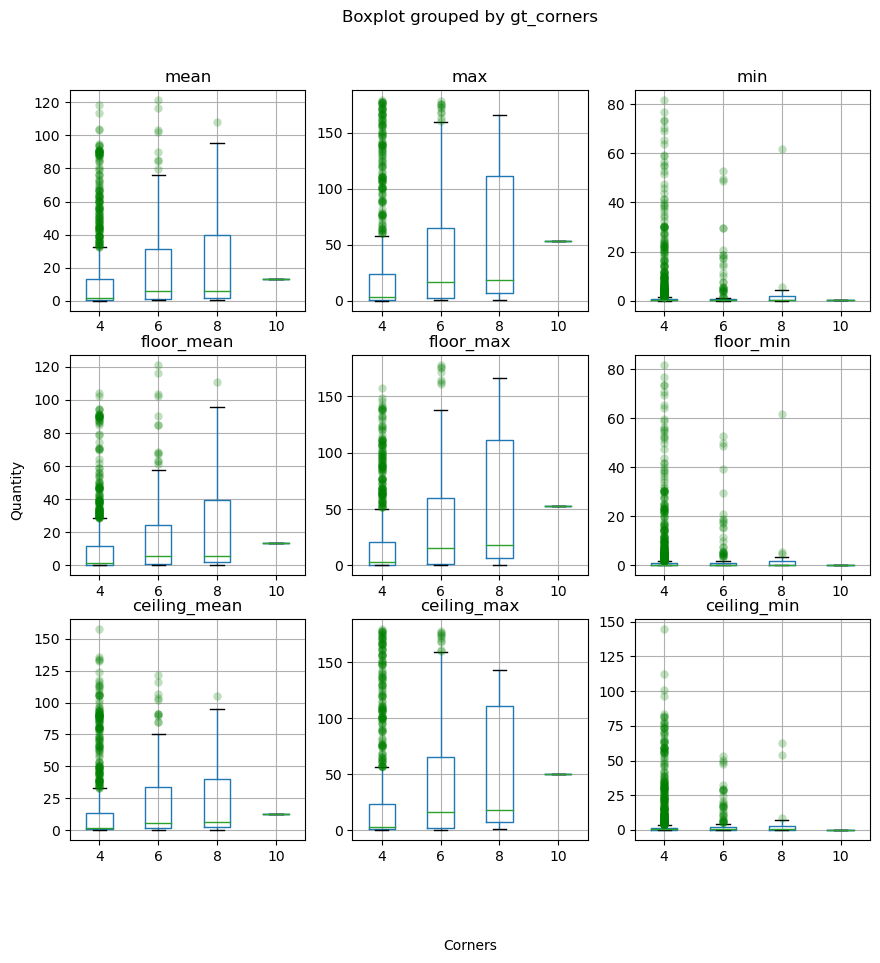

In [62]:
fig, ax = plt.subplots(3, 3, figsize=(10, 10))
fig.text(0.5, 0.04, 'Corners', ha='center')
fig.text(0.04, 0.5, 'Quantity', va='center', rotation='vertical')
for index, column in enumerate(df_clear[["mean","max","min",	"floor_mean", "floor_max", "floor_min", "ceiling_mean",	"ceiling_max", "ceiling_min"]]):
    sub = plt.subplot(3, 3, index+1)
    df_clear.boxplot(column = column, by = 'gt_corners', ax= sub, flierprops = dict(markerfacecolor = 'g',  linestyle = "none", markeredgecolor='none', alpha=0.25))
    plt.xlabel("")

Можно заметить что из общих данных сильно выбивается помещение с 10ю углами.

In [63]:
df_clear[df.gt_corners == 10]

,gt_corners,mean,max,min,floor_mean,floor_max,floor_min,ceiling_mean,ceiling_max,ceiling_min
739,10,13.202775,53.145464,0.195567,13.67592,53.145464,0.262791,12.72963,49.7854,0.195567


У нас только одно измерение, что и показывают графики.

В самих данных прослеживается ряд зависимостей между средними, максимальными и минимальными значениями углов. При большом наличии зависимостей проще построить модель которая достаточно точна.

Также помимо диаграмм распределений, диаграмм рассеяния ящиков с усами, для подтверждения наличия зависимостей можно вывети корреляционную матрицу, которая возможно будет более наглядна.

Чтобы увидеть зависимости данные необходимо сгруппировать по углам и найти их среднее.

In [89]:
df_clear.groupby(["gt_corners"]).mean()

,mean,max,min,floor_mean,floor_max,floor_min,ceiling_mean,ceiling_max,ceiling_min
gt_corners,,,,,,,,,
4,11.743625,22.276606,2.913603,9.856579,17.420663,3.155199,13.630671,21.668738,5.611747
6,19.771737,44.645496,2.839394,17.746855,37.646154,2.977508,21.796619,44.207992,4.703516
8,23.616022,51.669649,4.050655,23.588693,51.150189,4.089372,23.643351,50.383783,7.083278
10,13.202775,53.145464,0.195567,13.675920,53.145464,0.262791,12.729630,49.785400,0.195567


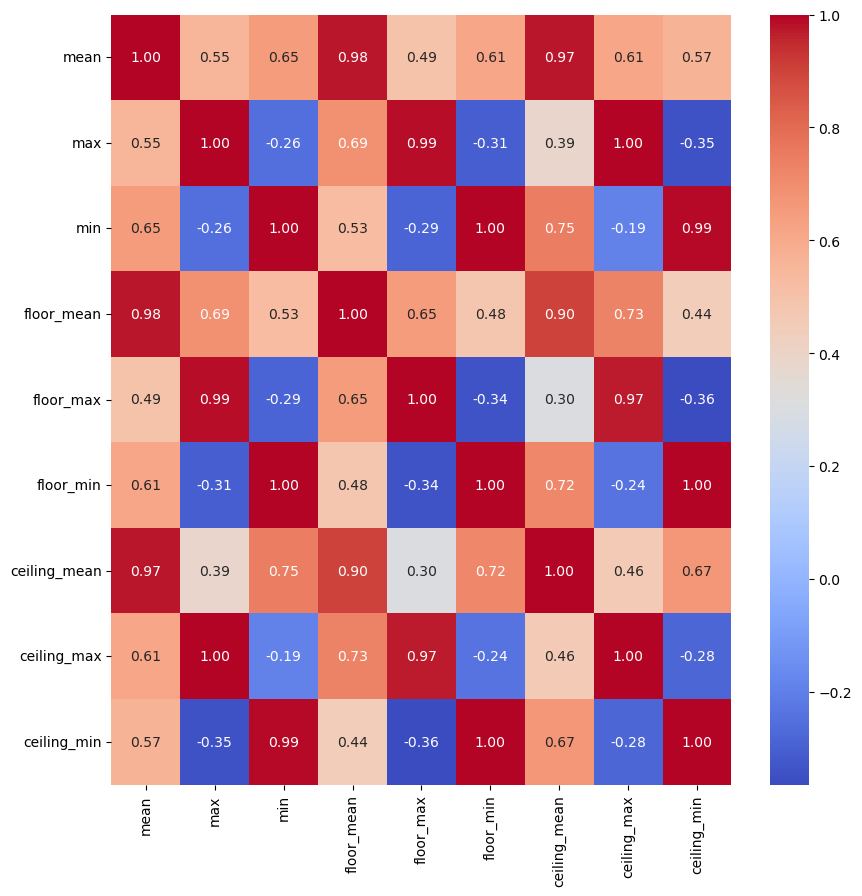

In [85]:
correlations = df_clear.groupby(["gt_corners"]).mean().corr()
fig = plt.figure(figsize=(10,10))
sns.heatmap(correlations, annot = True, fmt = '.2f', cmap='coolwarm')
plt.show()